# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_csv("Advertising.csv",index_col=0)

In [3]:
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [4]:
data.tail()

TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

In [6]:
data.shape

(200, 4)

# Checking for Null Values

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualizing the relationship

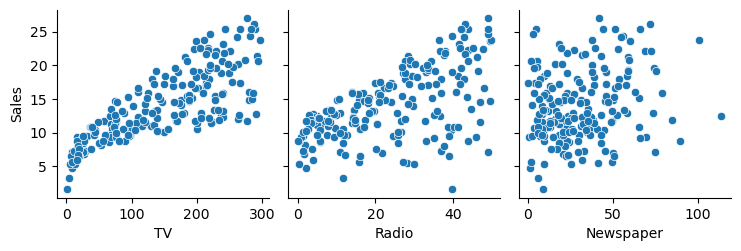

In [9]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

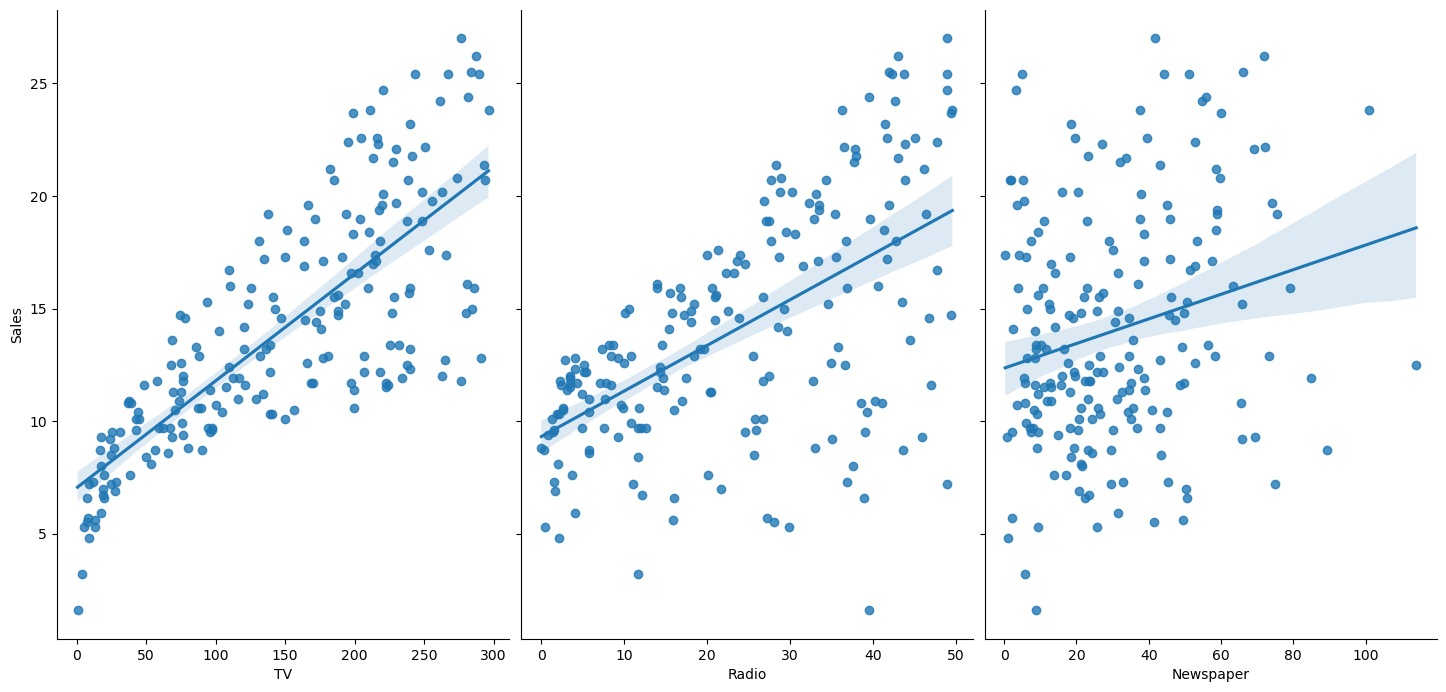

In [10]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='reg')

# Preparing X and y matrix

In [61]:
feature_cols = ['TV','Radio','Newspaper']
X = np.array(data[feature_cols])
y = np.array(data['Sales'])

# Splitting X and y into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linreg = LinearRegression()

In [63]:
linreg.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred = linreg.predict(X_test)

In [65]:
print(linreg.score(X_test,y_test))

0.8927605914615386


# Computing RMSE for Sales Predictions

In [27]:
from sklearn import metrics

In [55]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4113417558581574


# Checking RMSE removing 'Newspaper'

In [66]:
feature_cols = ['TV','Radio']
X = np.array(data[feature_cols])
y = np.array(data['Sales'])

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [68]:
linreg.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred = linreg.predict(X_test)

In [70]:
print(linreg.score(X_test,y_test))

0.8947344950027069


In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3982924890777741


# Testing

In [72]:
test_1 = np.array([[230.1,37.8]])
print(linreg.predict(test_1))

[20.53654212]


In [73]:
test_2 = np.array([[232.1,8.6]])
print(linreg.predict(test_2))

[15.37409216]
